 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline


# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path('Resources/whale_returns.csv')
whale_returns = pd.read_csv(whale_path,parse_dates=True,index_col='Date',infer_datetime_format=True)
whale_returns.head() 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_path = Path('Resources/algo_returns.csv')
algo_returns = pd.read_csv(algo_path,parse_dates=True,index_col='Date',infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_path = Path('Resources/sp500_history.csv')
sp500_df = pd.read_csv(sp500_path,parse_dates=True,index_col='Date',infer_datetime_format=True)
sp500_df.sort_index(inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types"
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_df.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns.dropna()


,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns.columns = ['S&P500']


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combine_returns = pd.concat([whale_returns, algo_returns,sp500_returns], axis="columns", join="inner")
combine_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

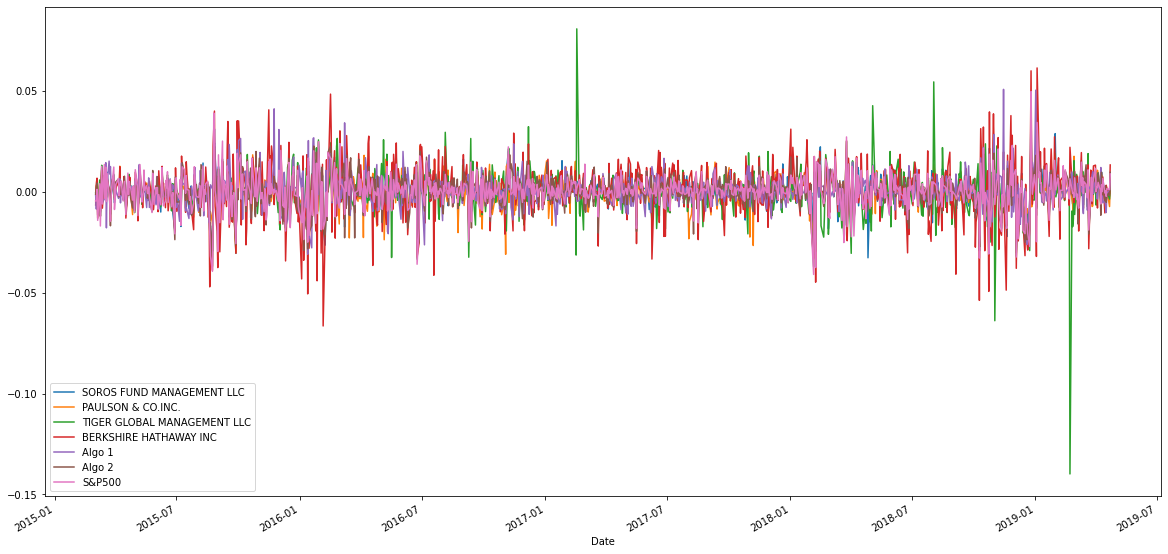

In [15]:
# Plot daily returns of all portfolios
combine_returns.plot(figsize=(20,10))


#### Calculate and Plot cumulative returns.

<AxesSubplot:>

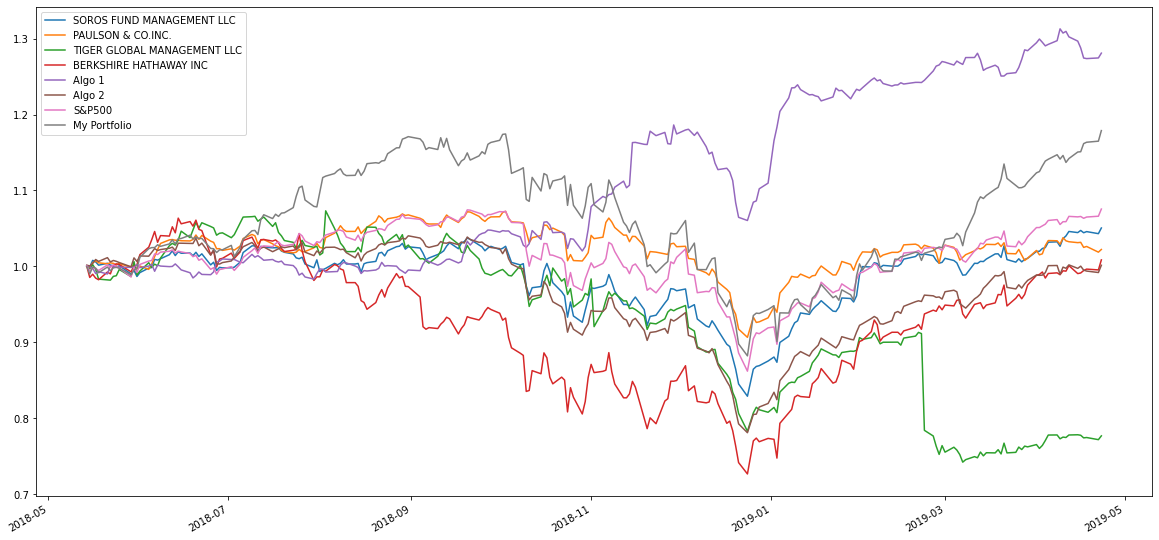

In [55]:
# Calculate cumulative returns of all portfolios
combine_cum_returns = (1+combine_returns).cumprod()
# Plot cumulative returns
combine_cum_returns.plot(figsize = (20,10))


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

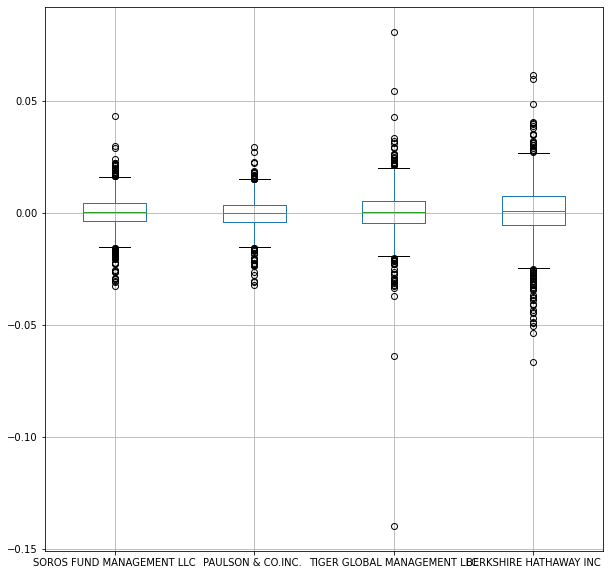

In [17]:
# Box plot to visually show risk
whale_returns.boxplot(figsize = (10,10))


<AxesSubplot:>

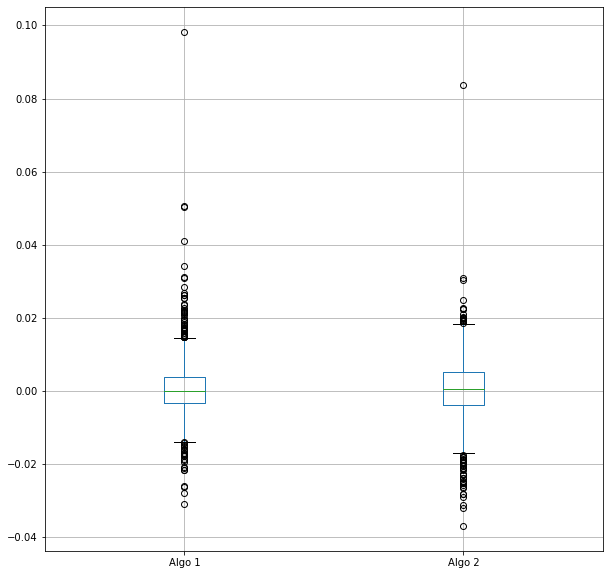

In [18]:
algo_returns.boxplot(figsize=(10,10))


<AxesSubplot:>

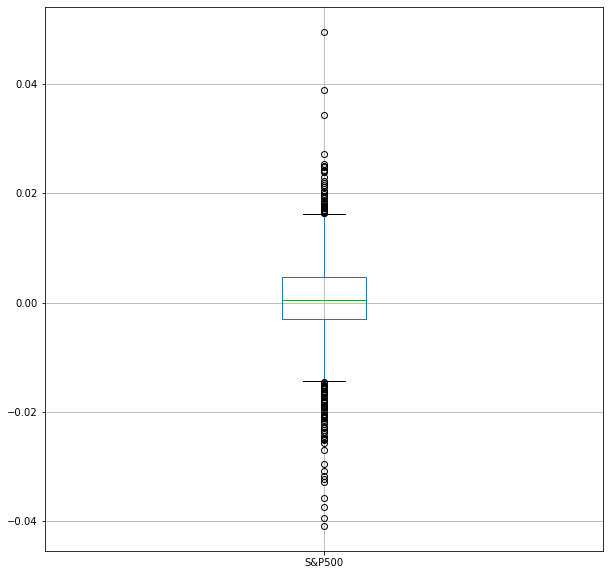

In [19]:
sp500_returns.boxplot(figsize=(10,10))


### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
whale_std= whale_returns.std()
whale_std.head()


SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [21]:
algo_std=algo_returns.std()
algo_std.head()

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [22]:
# Calculate  the daily standard deviation of S&P 500
sp500_std=sp500_returns.std()
sp500_std.head()



S&P500    0.008111
dtype: float64

In [23]:
# Determine which portfolios are riskier than the S&P 500
whale_std_avg = whale_std.mean()
if whale_std_avg>sp500_std[0]:
    print("Whale portfolio is riskier than the S&P 500")
else:
    print("Whale portfolio is less risker than the S&P 500")
        
algo_std_avg=algo_std.mean()
if algo_std_avg>sp500_std[0]:
    print("Algo portfolio is riskier than the S&P 500")
else:
    print("Algo portfolio is less risker than the S&P 500")

Whale portfolio is riskier than the S&P 500
Algo portfolio is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [24]:
# Calculate the annualized standard deviation (252 trading days)
annualized_sp500_std = sp500_std * np.sqrt(252)
annualized_sp500_std.head()


S&P500    0.128762
dtype: float64

---

In [25]:
annualized_whale_std = whale_std * np.sqrt(252)
annualized_whale_std.head()

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [26]:
annualized_algo_std = algo_std * np.sqrt(252)
annualized_algo_std.head()

Algo 1    0.126801
Algo 2    0.134401
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

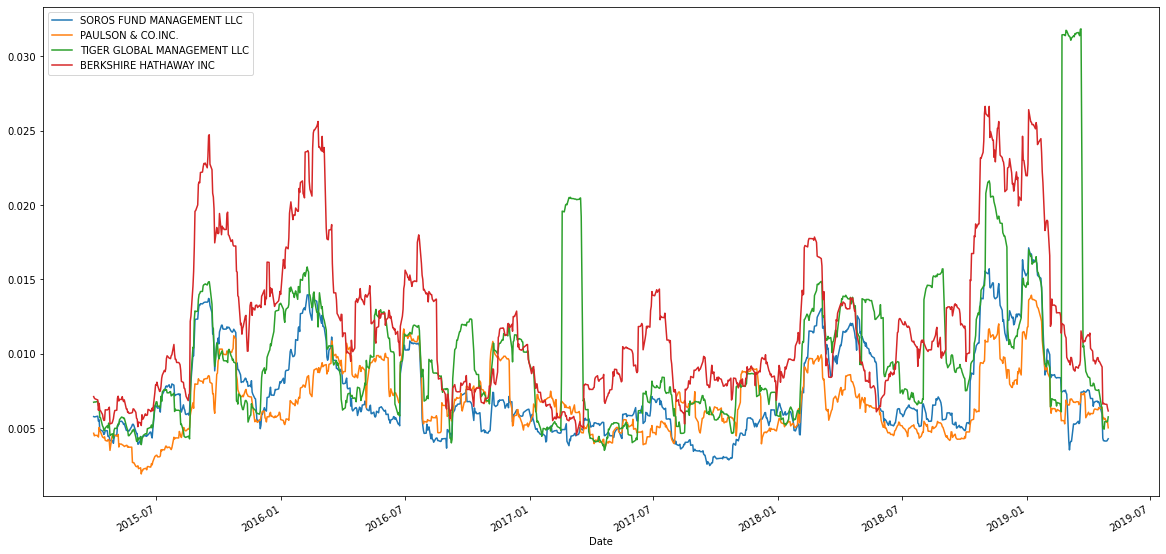

In [27]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whale_returns.rolling(window=21).std().plot(figsize=(20,10))
# Plot the rolling standard deviation


<AxesSubplot:xlabel='Date'>

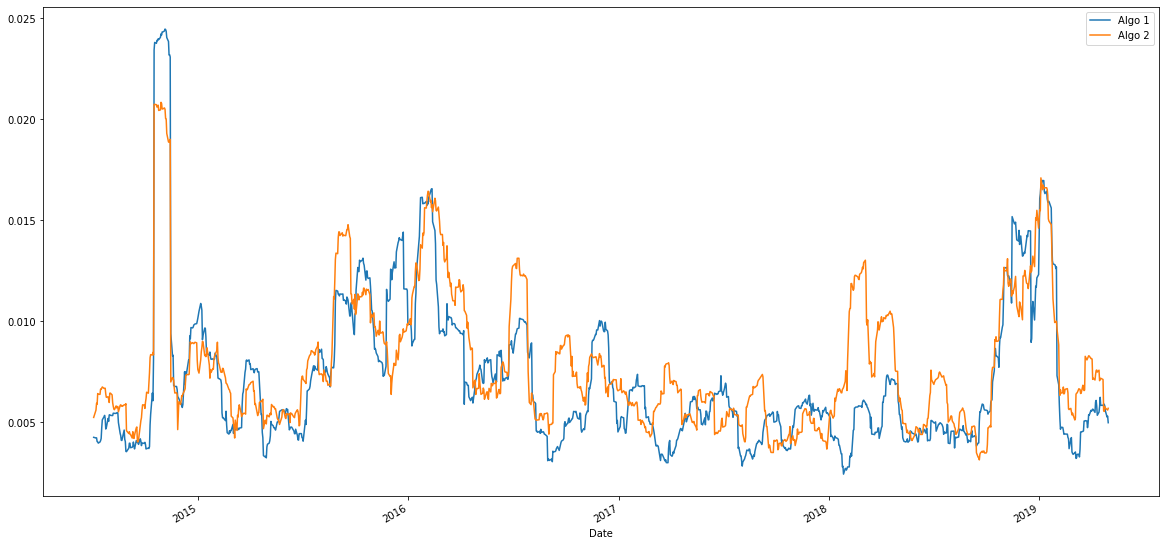

In [56]:
algo_returns.rolling(window=21).std().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

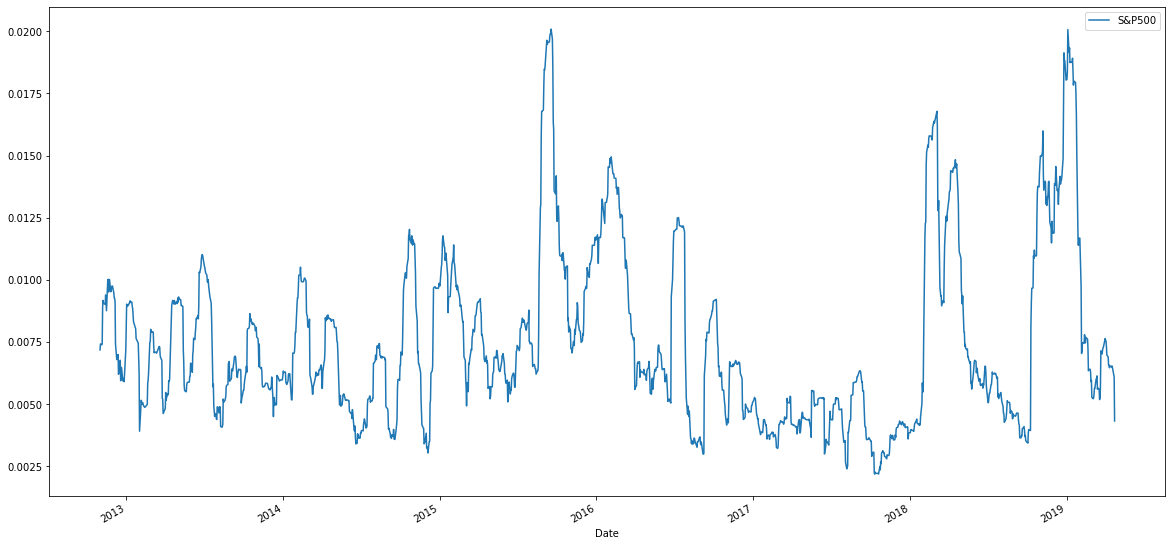

In [58]:
sp500_returns.rolling(window=21).std().plot(figsize=(20,10))

### Calculate and plot the correlation

In [68]:
# Calculate the correlation
corr_matrix=combine_returns.corr()
# Display de correlation matrix
corr_matrix

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo1'}, xlabel='Date'>

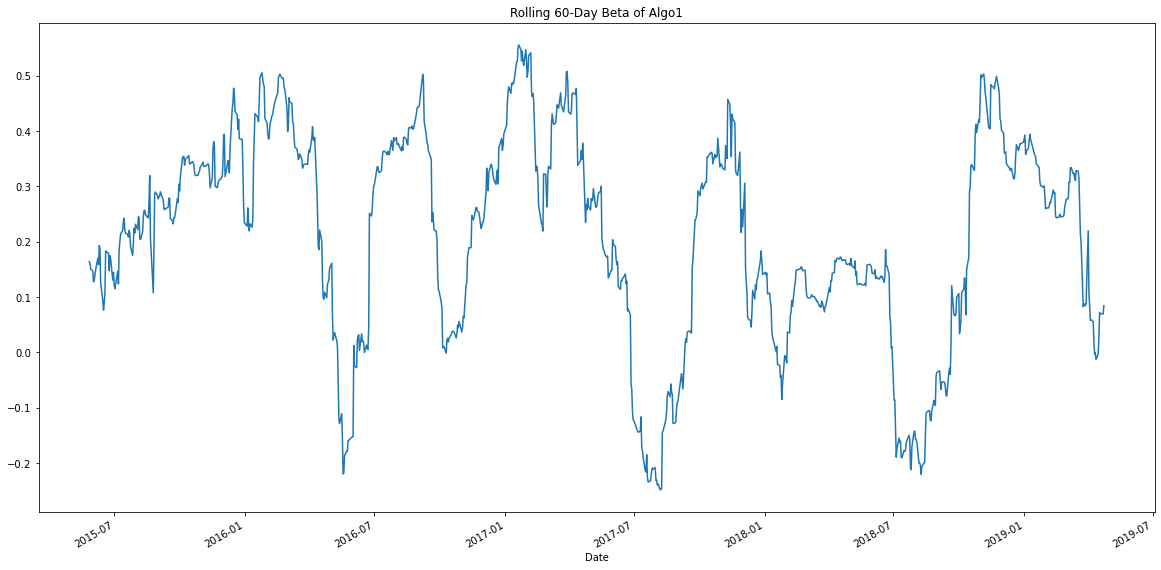

In [31]:
# Calculate covariance of a single portfolio
algo1_rolling_covariance = combine_returns['Algo 1'].rolling(window=60).cov(combine_returns['S&P500'])
# Calculate variance of S&P 500
sp500_rolling_variance = combine_returns['S&P500'].rolling(window=60).var()
# Computing beta
algo1_rolling_beta= algo1_rolling_covariance/sp500_rolling_variance
# Plot beta trend
algo1_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

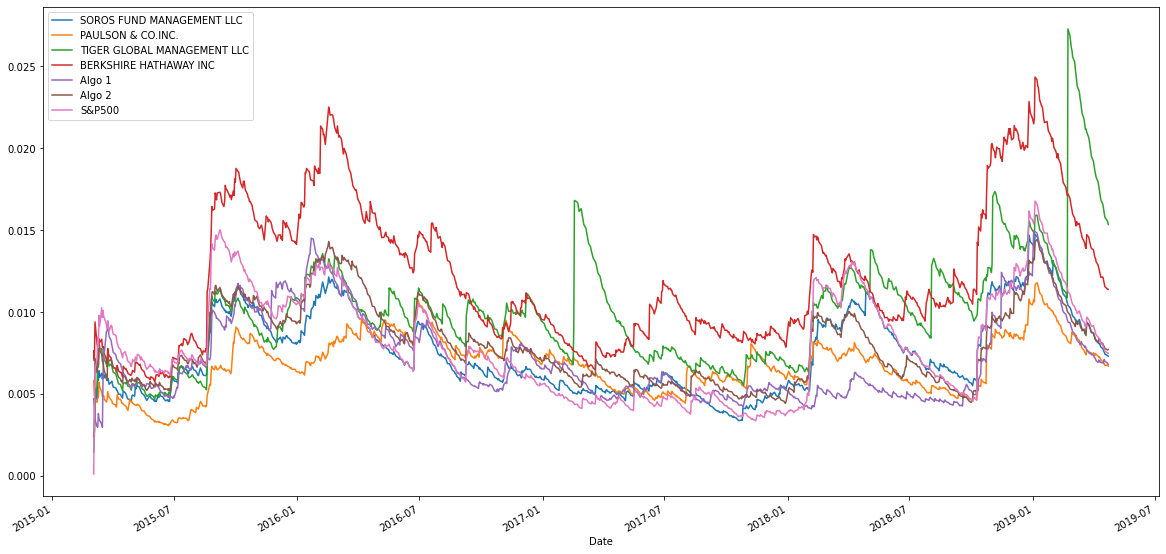

In [34]:
# Use `ewm` to calculate the rolling window
combine_returns.ewm(halflife=21).std().plot(figsize=(20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [35]:
# Annualized Sharpe Ratios
sharpe_ratios = (combine_returns.mean() * 252) / (combine_returns.std() * np.sqrt(252))
sharpe_ratios


SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

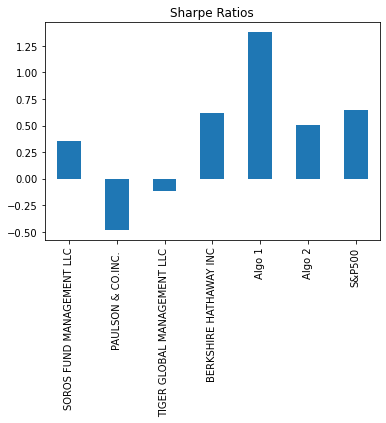

In [36]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")


### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

In [37]:
print("The Algo 1 outperformed S&P 500 and whales portfolios. The Algo 2 underperformed S&P 500 and Berkshire Hathaway and outperformed other stocks in whales portfolios")



The Algo 1 outperformed S&P 500 and whales portfolios. The Algo 2 underperformed S&P 500 and Berkshire Hathaway and outperformed other stocks in whales portfolios


---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [38]:
# Reading data from 1st stock
aapl_path = Path('Resources/aapl_historical.csv')
aapl_df = pd.read_csv(aapl_path,parse_dates=True,index_col='Trade DATE',infer_datetime_format=True)
aapl_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [39]:
# Reading data from 2nd stock
goog_path = Path('Resources/goog_historical.csv')
goog_df = pd.read_csv(goog_path,parse_dates=True,index_col='Trade DATE',infer_datetime_format=True)
goog_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [40]:
# Reading data from 3rd stock
cost_path = Path('Resources/cost_historical.csv')
cost_df = pd.read_csv(cost_path,parse_dates=True,index_col='Trade DATE',infer_datetime_format=True)
cost_df.head()


,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [41]:
# Combine all stocks in a single DataFrame
myportfolio = pd.concat([aapl_df, goog_df,cost_df], axis="columns", join="inner")
myportfolio.head()


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2019-05-09,AAPL,200.72,GOOG,1162.38,COST,243.47
2019-05-08,AAPL,202.90,GOOG,1166.27,COST,241.34
2019-05-07,AAPL,202.86,GOOG,1174.10,COST,240.18
2019-05-06,AAPL,208.48,GOOG,1189.39,COST,244.23
2019-05-03,AAPL,211.75,GOOG,1185.40,COST,244.62


In [42]:
# Reset Date index
myportfolio.sort_index(inplace=True)
myportfolio.head()


,Symbol,NOCP,Symbol,NOCP,Symbol,NOCP
Trade DATE,,,,,,
2018-05-11,AAPL,188.59,GOOG,1098.26,COST,195.76
2018-05-14,AAPL,188.15,GOOG,1100.20,COST,195.88
2018-05-15,AAPL,186.44,GOOG,1079.23,COST,195.48
2018-05-16,AAPL,188.18,GOOG,1081.77,COST,198.71
2018-05-17,AAPL,186.99,GOOG,1078.59,COST,199.60


In [43]:
# Reorganize portfolio data by having a column per symbol
myportfolio.drop(columns=['Symbol'],inplace = True)
column_name=['AAPL','GOOG','COST']
myportfolio.columns = column_name
myportfolio.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60


In [44]:
# Calculate daily returns
myportfolio_returns=myportfolio.pct_change()
# Drop NAs
myportfolio_returns.dropna(inplace=True)
# Display sample data
myportfolio_returns.head()


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [45]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
myportfolio_weighted_returns=weights*myportfolio_returns
myportfolio_weighted_returns = myportfolio_weighted_returns.sum(1)
# Display sample data
myportfolio_weighted_returns


Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Join your returns DataFrame to the original returns DataFrame
combine_returns = pd.concat([combine_returns,myportfolio_weighted_returns],axis="columns", join="inner")
combine_returns.rename(columns={0: 'My Portfolio'},inplace=True)
combine_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [47]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_returns.dropna(inplace=True)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [48]:
# Calculate the annualized `std`
combine_std = combine_returns.std()
annualized_combine_std = combine_std* np.sqrt(252)
annualized_combine_std


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P500                         0.152054
My Portfolio                   0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:>

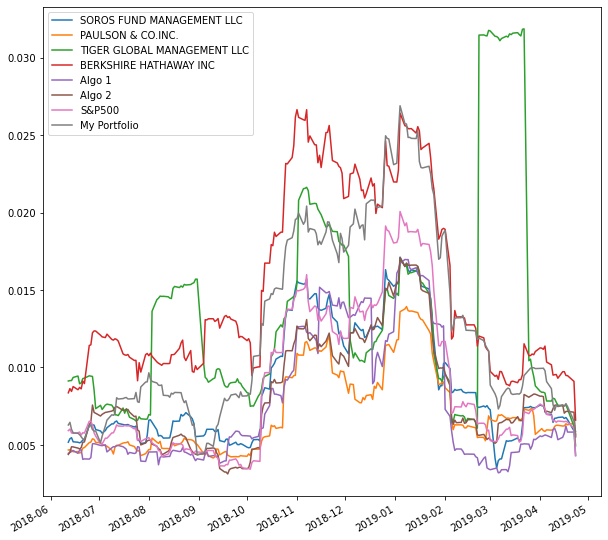

In [49]:
# Calculate rolling standard deviation
combine_rolling_std=combine_returns.rolling(window=21).std()

# Plot rolling standard deviation
combine_rolling_std.plot(figsize=(10,10))

### Calculate and plot the correlation

In [50]:
# Calculate and plot the correlation
# Calculate the correlation
corrMatrix = combine_returns.corr()
# Display de correlation matrix
corrMatrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
My Portfolio,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of myportfolio'}>

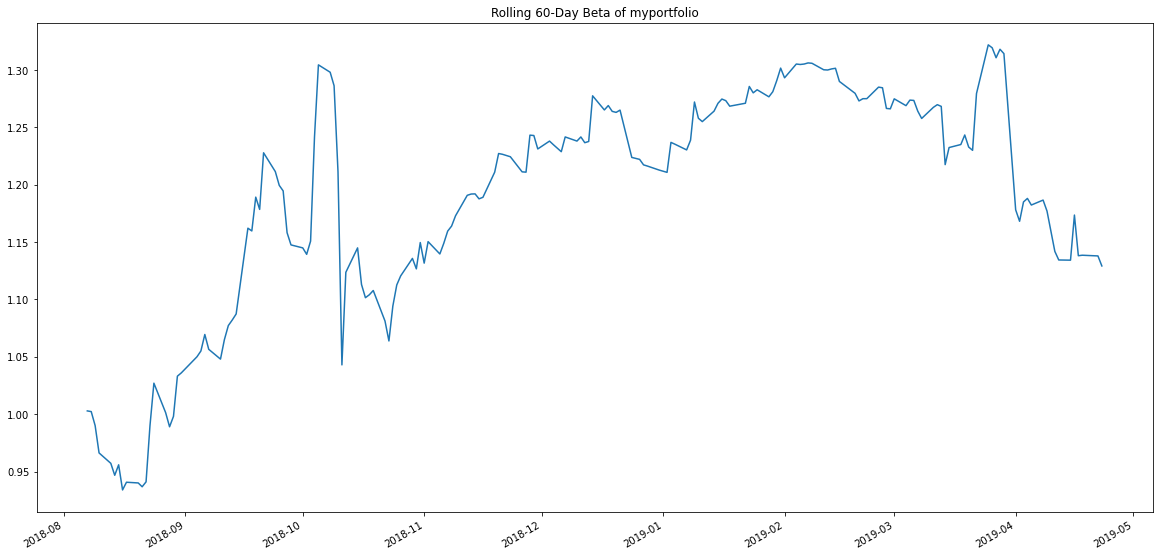

In [51]:
# Calculate and plot Beta
myportfolio_rolling_covariance = combine_returns['My Portfolio'].rolling(window=60).cov(combine_returns['S&P500'])
# Calculate variance of S&P 500
sp500_rolling_variance = combine_returns['S&P500'].rolling(window=60).var()
# Computing beta
myportfolio_rolling_beta= myportfolio_rolling_covariance/sp500_rolling_variance
# Plot beta trend
myportfolio_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of myportfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [52]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combine_returns.mean() * 252) / (combine_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P500                         0.584820
My Portfolio                   0.933123
dtype: float64

<AxesSubplot:>

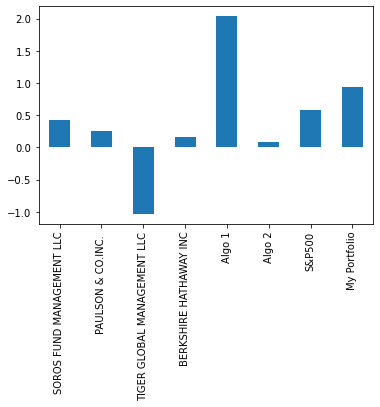

In [53]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar')

### How does your portfolio do?

Write your answer here!

In [54]:
print("My portoflio outperformce S&P 500.")

My portoflio outperformce S&P 500.
